In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("Diabetes dataset.csv")

### 1

In [62]:
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

In [64]:
df_0= df[df['Outcome']==0][features]

In [66]:
df_1=df[df['Outcome']==1][features]

In [68]:
df_0.shape

(500, 4)

In [70]:
df_1.shape

(268, 4)

### 2

In [72]:
M0=df_0.corr()

In [74]:
M1=df_1.corr()

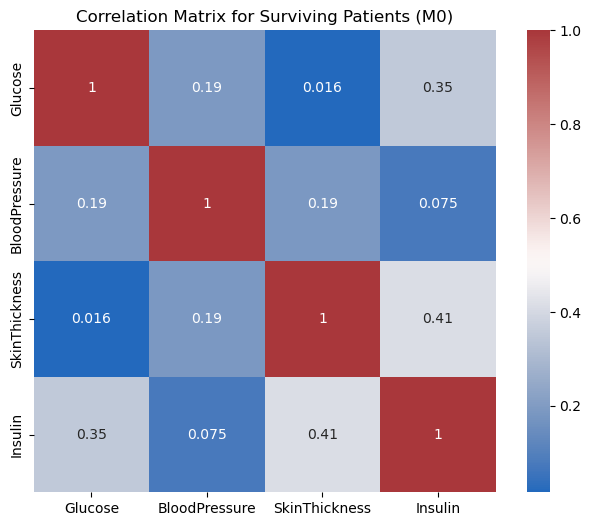

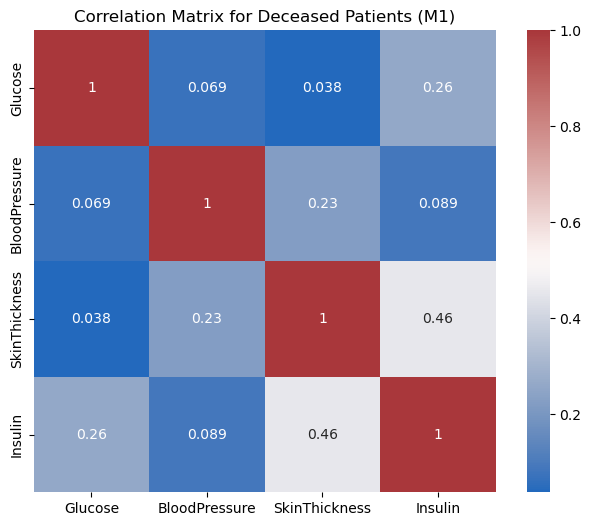

In [76]:
M0 = df_0.corr()
M1 = df_1.corr()

# Plot and display the correlation matrix for df_0 (surviving patients)
plt.figure(figsize=(8, 6))
sns.heatmap(M0, annot=True, cmap="vlag", cbar=True, square=True)
plt.title("Correlation Matrix for Surviving Patients (M0)")
plt.savefig("correlation_matrix_M0.png") 
plt.show()  

# Plot and display the correlation matrix for df_1 (deceased patients)
plt.figure(figsize=(8, 6))
sns.heatmap(M1, annot=True, cmap="vlag", cbar=True, square=True)
plt.title("Correlation Matrix for Deceased Patients (M1)")
plt.savefig("correlation_matrix_M1.png")  
plt.show()  

### 3

(a) Which features have the highest correlation for healthy (surviving) patients?

The highest correlation is between Insulin and Skin Thickness with a correlation coefficient of 0.41.

(b) Which features have the lowest correlation for healthy (surviving) patients?

Skin Thickness and Glucose has the lowest correlation of approximately 0.016.

(c) Which features have the highest correlation for unhealthy (deceased) patients?

The highest correlation is between SkinThickness and Insulin with a correlation of 0.46.

(d) Which features have the lowest correlation for unhealthy (deceased) patients?

Skin Thickness and Glucose has the lowest correlation of approximately 0.038.

(e) Are results the same for both cases?

Yes, despite slight differences in the correlation values, the relationships between the features remain consistent across both groups. The highest correlation is between insulin and skin thickness and lowest is between skin thickness and glucose. This suggests that the interactions among these features (Glucose, BloodPressure, SkinThickness, and Insulin) are similar for both healthy and unhealthy patients, though the strength of these interactions may vary slightly depending on health status.

### 4

In [79]:
# Compute means and standard deviations
summary = {
    "class": ["0", "1", "all"],
    "μ(f1)": [df_0['Glucose'].mean(), df_1['Glucose'].mean(), df['Glucose'].mean()],
    "σ(f1)": [df_0['Glucose'].std(), df_1['Glucose'].std(), df['Glucose'].std()],
    "μ(f2)": [df_0['BloodPressure'].mean(), df_1['BloodPressure'].mean(), df['BloodPressure'].mean()],
    "σ(f2)": [df_0['BloodPressure'].std(), df_1['BloodPressure'].std(), df['BloodPressure'].std()],
    "μ(f3)": [df_0['SkinThickness'].mean(), df_1['SkinThickness'].mean(), df['SkinThickness'].mean()],
    "σ(f3)": [df_0['SkinThickness'].std(), df_1['SkinThickness'].std(), df['SkinThickness'].std()],
    "μ(f4)": [df_0['Insulin'].mean(), df_1['Insulin'].mean(), df['Insulin'].mean()],
    "σ(f4)": [df_0['Insulin'].std(), df_1['Insulin'].std(), df['Insulin'].std()]
}

summary_df = pd.DataFrame(summary).round(2)
print(summary_df)


  class   μ(f1)  σ(f1)  μ(f2)  σ(f2)  μ(f3)  σ(f3)   μ(f4)   σ(f4)
0     0  109.98  26.14  68.18  18.06  19.66  14.89   68.79   98.87
1     1  141.26  31.94  70.82  21.49  22.16  17.68  100.34  138.69
2   all  120.89  31.97  69.11  19.36  20.54  15.95   79.80  115.24


### 5

Glucose (f1):

Mean (μ): Unhealthy patients (class 1) have a significantly higher mean glucose level (141.26) compared to healthy patients (class 0) with a mean of 109.98. This difference suggests that higher glucose levels are associated with unhealthy (diabetic) patients.

Standard Deviation (σ): The standard deviation is slightly higher for unhealthy patients (31.94) compared to healthy patients (26.14), indicating slightly more variability in glucose levels among unhealthy patients.

Blood Pressure (f2):

Mean (μ): The mean blood pressure for unhealthy patients (70.82) is slightly higher than for healthy patients (68.18), but the difference is not as pronounced as with glucose.

Standard Deviation (σ): Unhealthy patients also have a higher standard deviation (21.49) than healthy patients (18.06), suggesting more variability in blood pressure among unhealthy patients.

Skin Thickness (f3):

Mean (μ): Unhealthy patients have a higher mean skin thickness (22.16) compared to healthy patients (19.66). This indicates a slight association of thicker skin with unhealthy patients.

Standard Deviation (σ): Similar to the other features, unhealthy patients show more variability in skin thickness (17.68) than healthy patients (14.89).

Insulin (f4):

Mean (μ): Unhealthy patients have a considerably higher mean insulin level (100.34) compared to healthy patients (68.79), suggesting that higher insulin levels may be linked to diabetes.

Standard Deviation (σ): Unhealthy patients also show greater variability in insulin levels (138.69) compared to healthy patients (98.87), indicating that insulin levels are more widely spread among unhealthy patients.

Observed Patterns:

Higher Averages in Unhealthy Patients: Unhealthy patients generally have higher mean values for all four features (Glucose, Blood Pressure, Skin Thickness, and Insulin) compared to healthy patients. This pattern aligns with common characteristics of diabetes, where elevated glucose and insulin levels are often present.

Greater Variability in Unhealthy Patients: The standard deviations for all four features are higher in unhealthy patients, indicating more variability in these measurements among those with diabetes.

In [105]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Prepare data and labels
X = df[features]
y = df['Outcome']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "k-NN (k=1)": KNeighborsClassifier(n_neighbors=1),
    "k-NN (k=3)": KNeighborsClassifier(n_neighbors=3),
    "k-NN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayesian": GaussianNB(),
    "Linear Discriminant": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant": QuadraticDiscriminantAnalysis()
}

# Initialize results list
results = []

# Loop through models, fit, predict, and calculate metrics
for name, model in models.items():
    model.fit(X_train, y_train)  # Train on the training set
    y_pred = model.predict(X_test)  # Predict on the test set
    
    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    tpr = tp / (tp + fn)  # True Positive Rate (Recall)
    tnr = tn / (tn + fp)  # True Negative Rate
    
    # Append results
    results.append([name, tp, fp, tn, fn, accuracy, tpr, tnr])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=["Method", "TP", "FP", "TN", "FN", "Accuracy", "TPR", "TNR"])
print(results_df)


                   Method  TP  FP   TN  FN  Accuracy       TPR       TNR
0     Logistic Regression  70  34  220  60  0.755208  0.538462  0.866142
1              k-NN (k=1)  61  69  185  69  0.640625  0.469231  0.728346
2              k-NN (k=3)  66  62  192  64  0.671875  0.507692  0.755906
3              k-NN (k=5)  68  61  193  62  0.679688  0.523077  0.759843
4          Naive Bayesian  66  39  215  64  0.731771  0.507692  0.846457
5     Linear Discriminant  70  33  221  60  0.757812  0.538462  0.870079
6  Quadratic Discriminant  66  37  217  64  0.736979  0.507692  0.854331


### 7

Examining Model Results in Relation to Correlation Patterns

Naive Bayes Performance:

Naive Bayes assumes that all features are independent of each other, meaning it does not consider any correlations between them.
The low correlations in the data support this assumption reasonably well, allowing Naive Bayes to perform at a moderate level. Its accuracy (0.7317) is comparable to other models but slightly lower than models that consider feature relationships, like Logistic Regression and LDA.

Conclusion: The weak correlations among features allow Naive Bayes to work reasonably well, but its performance is slightly lower than models that do take some relationships into account.

Logistic Regression and Linear Discriminant Analysis (LDA):

Logistic Regression and LDA are linear models that can capture linear relationships between features and the target variable. They do not rely heavily on feature correlations but can handle the relationships better than Naive Bayes.

Since correlations in this dataset are generally low, both models can easily capture the main linear patterns without being strongly influenced by feature interdependence. These models achieve the highest accuracy (0.7552 for Logistic Regression and 0.7578 for LDA), likely because they are well-suited for data with low to moderate feature correlations.

Conclusion: The low correlations allow Logistic Regression and LDA to perform well, as they are not hindered by strong interdependencies between features. These models leverage linear relationships effectively in this data.

Quadratic Discriminant Analysis (QDA):

QDA allows for quadratic decision boundaries, which can handle more complex relationships between features.
However, since the features in this dataset have weak correlations, there may not be enough complex interactions to benefit from QDA’s flexibility. This is why QDA’s performance (0.7369 accuracy) is slightly lower than LDA’s, which assumes a simpler linear structure.

Conclusion: The weak correlations and likely linear separability in the data make QDA less effective than LDA, as the data does not appear to require the complex decision boundaries that QDA can provide.

k-Nearest Neighbors (k-NN):

k-NN relies on the distance between data points for classification, which can be influenced by how clustered or spread out features are. Low correlations might mean that features are relatively independent, which could make it harder for k-NN to find clear clusters, especially at lower values of 𝑘. The performance of k-NN models is generally lower (with accuracy ranging from 0.6406 to 0.6797), likely due to the lack of strong feature relationships that would create distinct clusters.

Conclusion: The low correlations between features might hinder k-NN’s ability to form meaningful neighborhoods for classification, leading to lower accuracy compared to linear models.